In [ ]:
import numpy as np

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


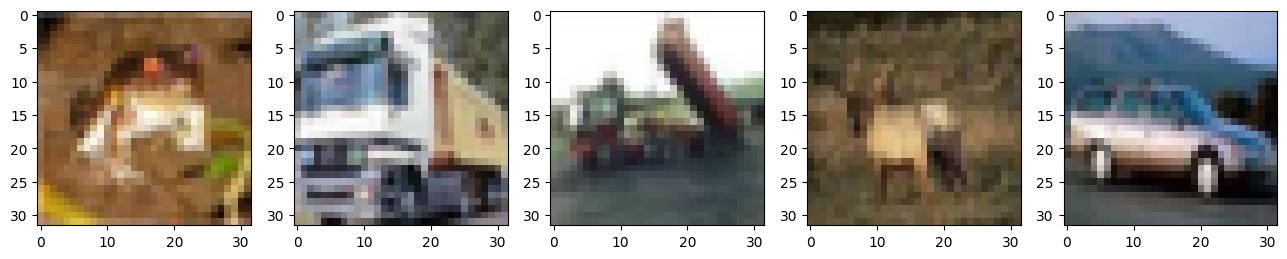

In [ ]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [ ]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

learning_rate = 0.001
momentum = 0.9
nesterov = True

optimizer = SGD(learning_rate=learning_rate,
                momentum=momentum,
                nesterov=nesterov)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

### if legacy optimizer not used
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01,
          weight_decay=1e-6,
          momentum=0.9,
          nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3324 - accuracy: 0.5294 - val_loss: 1.4621 - val_accuracy: 0.4840
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3091 - accuracy: 0.5383 - val_loss: 1.4907 - val_accuracy: 0.4823
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2897 - accuracy: 0.5448 - val_loss: 1.4674 - val_accuracy: 0.4835
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.2675 - accuracy: 0.5510 - val_loss: 1.4135 - val_accuracy: 0.5052
Epoch 5/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2477 - accuracy: 0.5586 - val_loss: 1.4058 - val_accuracy: 0.5076
Epoch 6/20
1250/1250 [==============================] - 26s 20ms/step - loss: 1.2284 - accuracy: 0.5689 - val_loss: 1.4366 - val_accuracy: 0.4994
Epoch 7/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2109 - accuracy: 0.5725 - val_loss: 1.4052 -

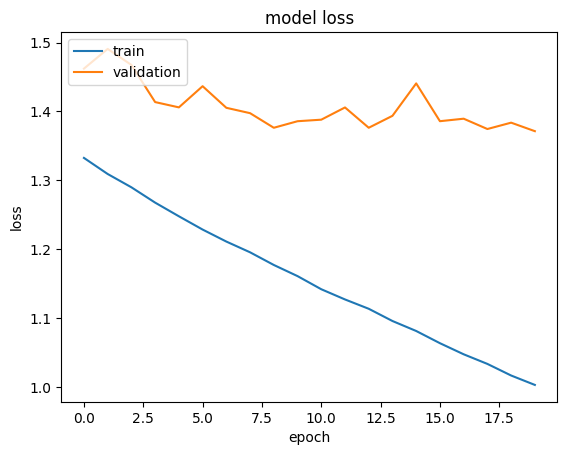

In [ ]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [ ]:


# Evaluating the MLP
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print(model.metrics_names)
print(score)


['loss', 'accuracy']
[2.4401230812072754, 0.14329999685287476]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

model1 = Sequential()
model1.add(Dense(256, activation='relu', input_dim=3072))
model1.add(BatchNormalization())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

learning_rate = 0.001
momentum = 0.9
nesterov = True

optimizer = SGD(learning_rate=learning_rate,
                momentum=momentum,
                nesterov=nesterov)

model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train,y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

In [ ]:
# Evaluating the MLP
score = model1.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy of model with one layer of batch normalization")
print(model1.metrics_names)
print(score)


In [ ]:
from tensorflow.keras import initializers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

## Xavier initialiser
initializer = initializers.GlorotNormal()

model2 = Sequential()
model2.add(Dense(256, activation='relu', input_dim=3072), kernel_initializer=initializer ) ##<- Initialiser
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

learning_rate = 0.001
momentum = 0.9
nesterov = True

optimizer = SGD(learning_rate=learning_rate,
                momentum=momentum,
                nesterov=nesterov)

model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train,y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

TypeError: ignored

In [ ]:
# Evaluating the MLP
score = model2.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy of model with one layer of Xavier initialiser")
print(model2.metrics_names)
print(score)